Use the first order condition (see Section 3.2 to determine the unique
stationary point of the function $g(w) = log(1+e^{w^Tw})$ where N = 2 (i.e., $w = \begin{bmatrix}
  w_1 & w_2\\
  \end{bmatrix}^T$)

a) 
$$ \frac{dg}{dw} = \frac{1}{1+e^{w^2}}2we^{w^2}$$

$$ \frac{dg}{dw} = \frac{2we^{w^2}}{1+e^{w^2}}$$

$$ \frac{2we^{w^2}}{1+e^{w^2}} = 0$$
$$ 2we^{w^2} = 0$$
$$ 2w = 0$$
$$ w = 0$$

b)
$$ \frac{2we^{w^2}}{1+e^{w^2}} $$

$$ \frac{dg^2}{dw} = \frac{(1+e^{w^2}(2e^{w^2} + 2we^{w^2}2w)) - 2we^{w^2}2we^{w^2}}{(1+e^{w^2})^2}$$

$$ \frac{dg^2}{dw} = \frac{2e^{w^2} + 4w^2e^{w^2} + 2e^{2w^2}}{(1+e^{w^2})^2}$$

$$ \frac{dg^2}{dw} = \frac{2e^{w^2}(2w^2 + (1 + e^{w^2})}{(1+e^{w^2})^2}$$

when I set this to 0 I dont just get positive values so I'm confused now?

(2, 100)


<IPython.core.display.Javascript object>


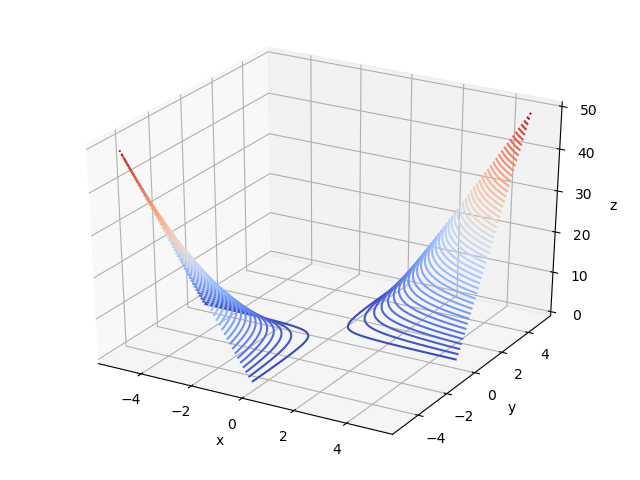

In [88]:
#I DONT THINK THIS IS CORRECT - SHOULD PROBS DELETE
from matplotlib import cm
from mpl_toolkits import mplot3d
g = lambda w: np.log(1 + np.exp(np.dot(w.T,w)))
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
w = np.array([x,y])
print(w.shape)
Z = g(w)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

c)

In [85]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True   
import matplotlib.pyplot as plt
# import statment for gradient calculator
from autograd import grad
from autograd import numpy as np
from autograd import value_and_grad
from autograd import hessian

def newtons_method(g, max_its, w, **kwargs):
    gradient = grad(g)
    #eigenvals of a square matrix -- C in our example
    hess = hessian(g)
    
    epsilon = 10**(-7)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']
        
    weight_history = [w]
    cost_history = [g(w)]
    
    for k in range(max_its):
        grad_eval = gradient(w[0])
        hess_eval = hess(w[0])
        
        hess_eval.shape = (int((np.size(hess_eval))**(.5)), int((np.size(hess_eval))**(.5)))
        #we're assuming it's positive aka convex
        
        #look at 4.8
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        
        #I don't follow how the below gets us to our next point
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

<IPython.core.display.Javascript object>


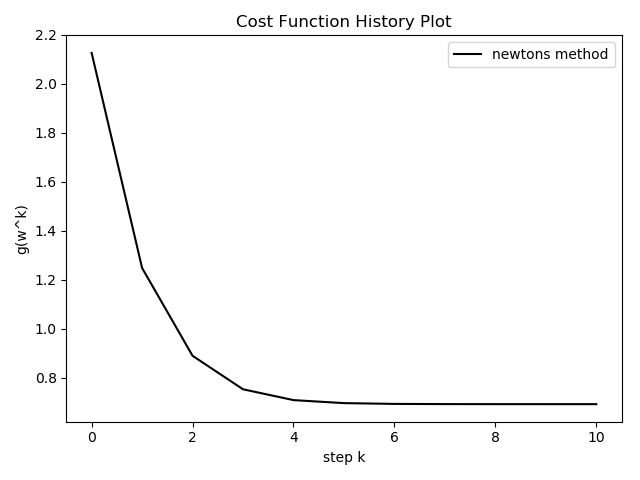

[array([1., 1.]), array([0.67487771, 0.67487771]), array([0.42556838, 0.42556838]), array([0.24288228, 0.24288228]), array([0.12801742, 0.12801742]), array([0.06503248, 0.06503248]), array([0.03265289, 0.03265289]), array([0.01634383, 0.01634382]), array([0.0081741 , 0.00817409]), array([0.00408732, 0.00408732]), array([0.00204369, 0.00204369])]
[2.1269280110429727, 1.2489295712418218, 0.8905668856475607, 0.753877991529356, 0.709669925790767, 0.6973853473635021, 0.6942139603544203, 0.6934143368817062, 0.6932139986136608, 0.6931638868817682, 0.6931513572507945]


In [86]:
# g = lambda w: np.log(1 + np.exp(w.T*w))
g = lambda w: np.log(1 + np.exp(np.dot(w.T,w)))
init_point = np.array([1.0, 1.0])
num_its = 10

a1_wh, a1_ch = newtons_method(g, num_its, init_point)
# a1_wh, a1_ch = gradient_descent(g, alpha_1, iterations, init_point)
# a2_wh, a2_ch = norm_gradient_descent(g, alpha_1, iterations, init_point, 'full')
# a3_wh, a3_ch = norm_gradient_descent(g, alpha_1, iterations, init_point, 'component')

fig1 = plt.figure()
plt.plot(a1_ch, 'k-', label = 'newtons method')
# plt.plot(a2_ch, 'm-', label = 'Fully Normalized grad descent')
# plt.plot(a3_ch, 'b-', label = 'Component Normalized grad descent')
plt.title("Cost Function History Plot")
plt.legend(loc="upper right")
plt.xlabel("step k")
plt.ylabel("g(w^k)")
plt.show();
print(a1_wh)
print(a1_ch)

d)

Below I have plotted the original function. What you can see is that at point 4 ... not sure...

<IPython.core.display.Javascript object>


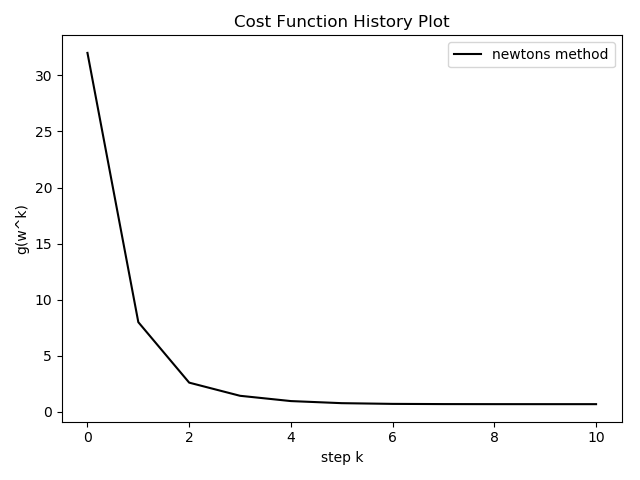

[array([1., 1.]), array([0.67487771, 0.67487771]), array([0.42556838, 0.42556838]), array([0.24288228, 0.24288228]), array([0.12801742, 0.12801742]), array([0.06503248, 0.06503248]), array([0.03265289, 0.03265289]), array([0.01634383, 0.01634382]), array([0.0081741 , 0.00817409]), array([0.00408732, 0.00408732]), array([0.00204369, 0.00204369])]


In [87]:
# import matplotlib.backends.backend_webagg_core
# reload(matplotlib.backends.backend_webagg_core)

plt.close(fig1)
init_point = np.array([4.0, 4.0])
num_its = 10

a2_wh, a2_ch = newtons_method(g, num_its, init_point)
# a1_wh, a1_ch = gradient_descent(g, alpha_1, iterations, init_point)
# a2_wh, a2_ch = norm_gradient_descent(g, alpha_1, iterations, init_point, 'full')
# a3_wh, a3_ch = norm_gradient_descent(g, alpha_1, iterations, init_point, 'component')

plt.plot(a2_ch, 'k-', label = 'newtons method')
# plt.plot(a2_ch, 'm-', label = 'Fully Normalized grad descent')
# plt.plot(a3_ch, 'b-', label = 'Component Normalized grad descent')
plt.title("Cost Function History Plot")
plt.legend(loc="upper right")
plt.xlabel("step k")
plt.ylabel("g(w^k)")
plt.show();
print(a1_wh)